# LGT Quick Start

LGT stands for Local and Global Trend, which is an important model type in orbit package. In the model equation, there is a local trend term and a global trend term.

In this notebook we will show how to use Orbit LGT models with the US unemployment claims data.

**Note: Negative response values are not allowed in LGT model, due to the existence of the global trend term.**

In [1]:
import pandas as pd
import numpy as np

from orbit.models.lgt import LGTMAP, LGTAggregated, LGTFull
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.dataset import load_iclaims

## Data

*iclaims_example* is a dataset containing the weekly initial claims for US unemployment benefits against a few related google trend queries (unemploy, filling and job) from Jan 2010 - June 2018. 
This aims to mimick the dataset from the paper [Predicting the Present with Bayesian Structural Time Series](https://people.ischool.berkeley.edu/~hal/Papers/2013/pred-present-with-bsts.pdf) by SCOTT and VARIAN (2014).

Number of claims are obtained from [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/series/ICNSA) while google queries are obtained through [Google Trends API](https://trends.google.com/trends/?geo=US).
Note that dataset is transformed by natural log before fitting in order to be fitted as a multiplicative model.

In [2]:
# load data
df = load_iclaims()

# define date and response column
DATE_COL = 'week'
RESPONSE_COL = 'claims'

df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [3]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


### Train / Test Split

In [4]:
test_size = 52

train_df = df[:-test_size]
test_df = df[-test_size:]

In [5]:
train_df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


## LGT Model

In orbit, we have three types of LGT models, `LGTMAP`, `LGTAggregated` and  `LGTFull`.
Orbit follows the sklearn model API. We can create an instance of the Orbit class and then call its fit and predict methods.

### LGTMAP

LGT model for MAP (Maximum a Posteriori) prediction

In [6]:
lgt = LGTMAP(response_col=RESPONSE_COL,
             date_col=DATE_COL,
             seasonality=52,
             seed=8888)

In [7]:
%%time
lgt.fit(df=train_df)

Initial log joint probability = -30.9972
CPU times: user 128 ms, sys: 30.4 ms, total: 158 ms
Wall time: 157 ms
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       760.403     0.0218398       53.3787           1           1       26   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39       782.754      0.117615       38.4083           1           1       48   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       789.109     0.0289643       43.8973      0.7353      0.7353       71   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       794.812     0.0709812       36.2821      0.2358           1       93   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       796.221     0.0183648       5.03814       1.506      0.1506      1

In [8]:
predicted_df = lgt.predict(df=test_df)

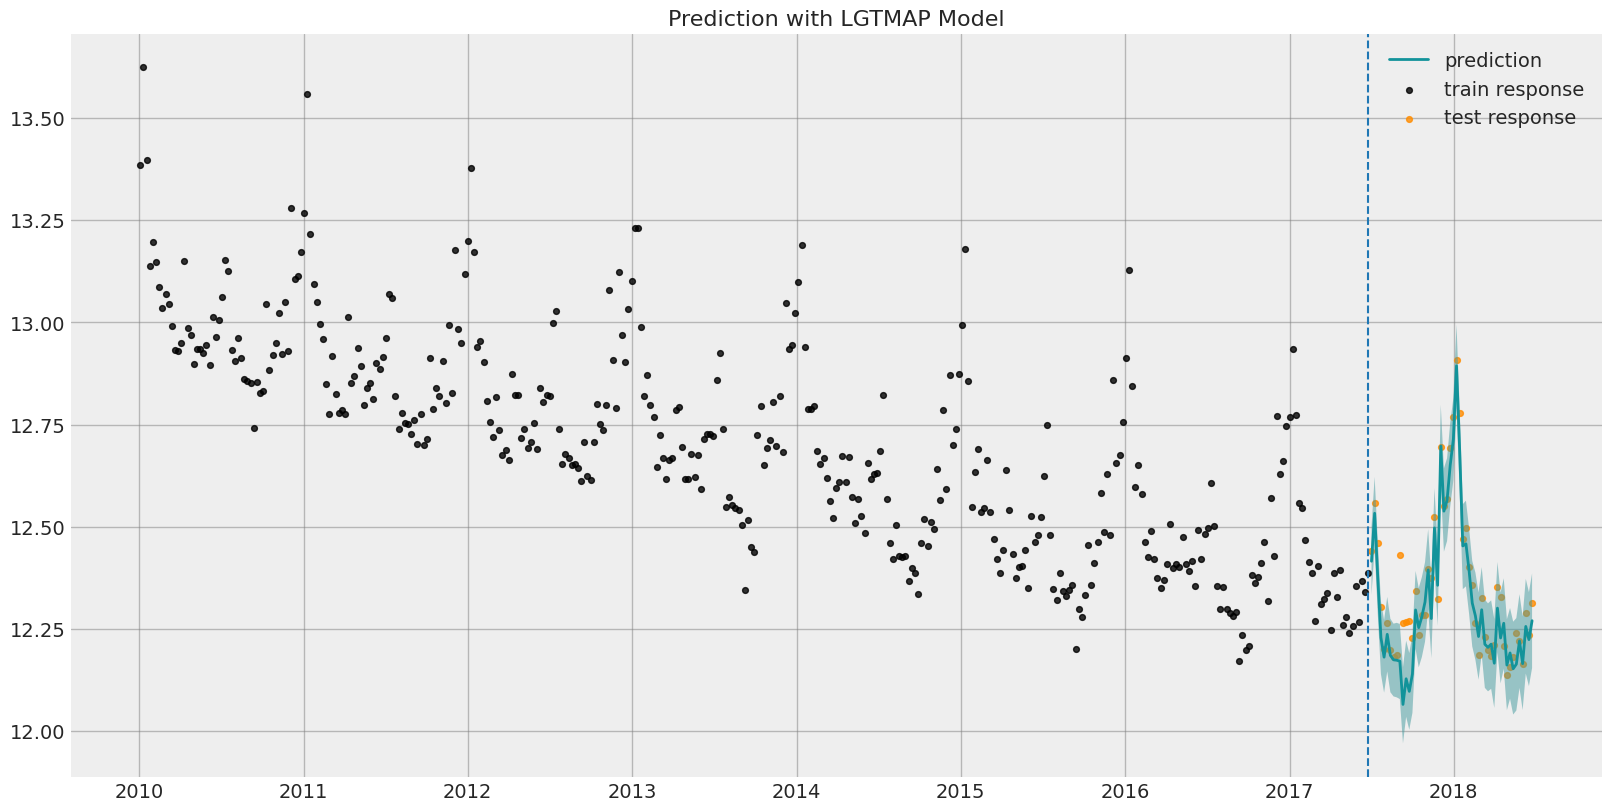

In [9]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df, 
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,  
                        test_actual_df=test_df,
                        title='Prediction with LGTMAP Model')

### LGTFull

LGT model for full prediction. In full prediction, the prediction occurs as a function of each parameter posterior sample, and the prediction results are aggregated after prediction. Prediction will always return the median (aka 50th percentile) along with any additional percentiles that are specified.

In [10]:
lgt = LGTFull(response_col=RESPONSE_COL,
              date_col=DATE_COL,
              seasonality=52,
              seed=8888)

In [11]:
%%time
lgt.fit(df=train_df)





Gradient evaluation took 0.000498 seconds
Gradient evaluation took 0.000484 seconds
Gradient evaluation took 0.00051 seconds
1000 transitions using 10 leapfrog steps per transition would take 4.98 seconds.
1000 transitions using 10 leapfrog steps per transition would take 4.84 seconds.
1000 transitions using 10 leapfrog steps per transition would take 5.1 seconds.
Adjust your expectations accordingly!
Adjust your expectations accordingly!
Adjust your expectations accordingly!






Gradient evaluation took 0.000531 seconds
1000 transitions using 10 leapfrog steps per transition would take 5.31 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  50 / 250 [ 20%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iter

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Iteration: 250 / 250 [100%]  (Sampling)

 Elapsed Time: 6.61452 seconds (Warm-up)
               0.563422 seconds (Sampling)
               7.17794 seconds (Total)

CPU times: user 61.8 ms, sys: 94.5 ms, total: 156 ms
Wall time: 7.31 s


In [12]:
predicted_df = lgt.predict(df=test_df)

In [13]:
predicted_df.tail()

,week,prediction_5,prediction,prediction_95
47,2018-05-27,12.136743,12.225383,12.358117
48,2018-06-03,12.074492,12.184872,12.313556
49,2018-06-10,12.157813,12.269869,12.375064
50,2018-06-17,12.137108,12.235353,12.351496
51,2018-06-24,12.196438,12.291303,12.427341


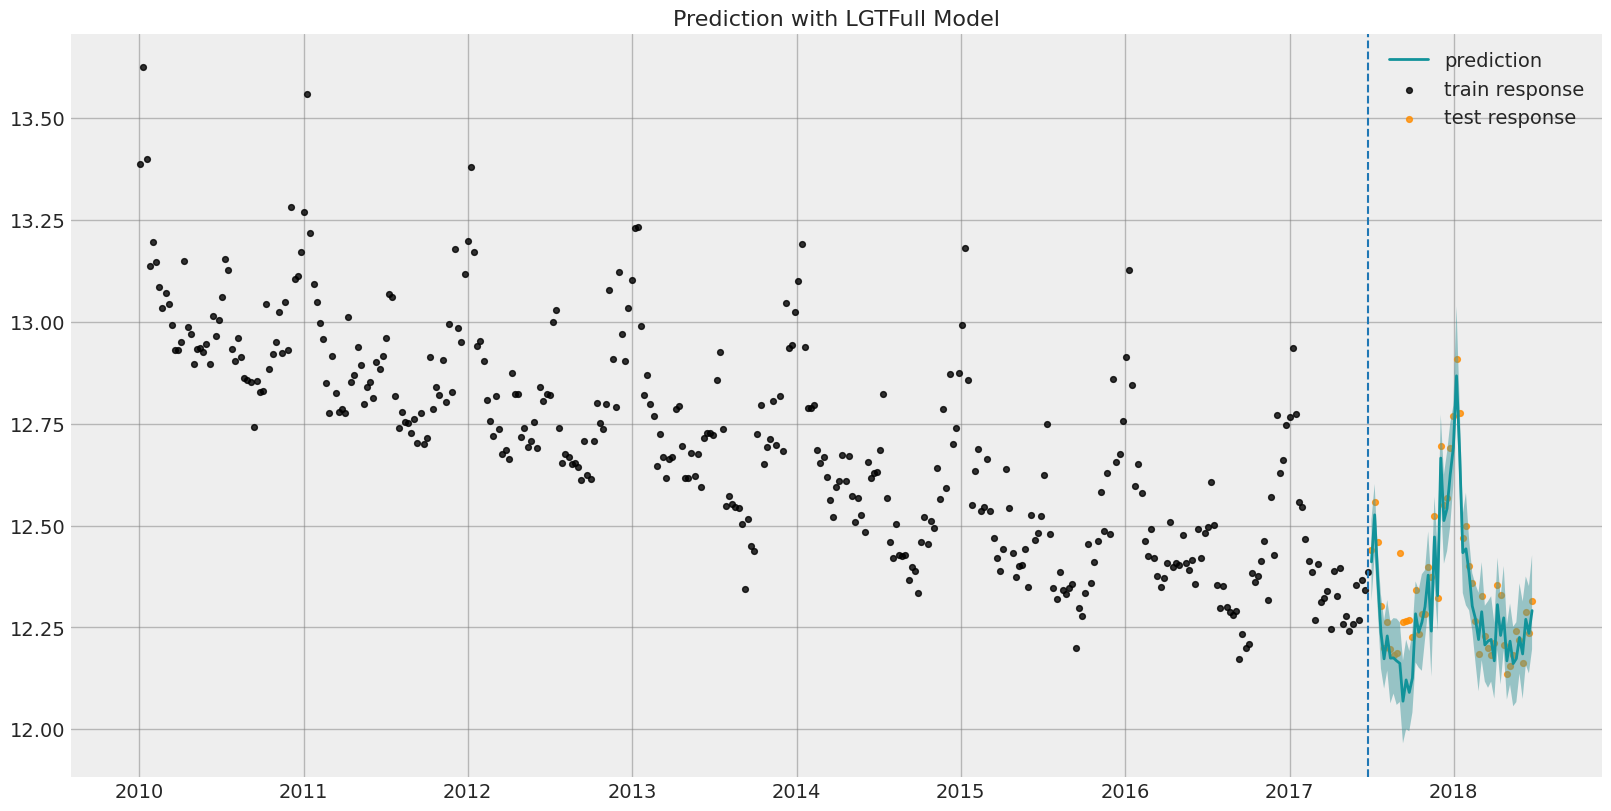

In [14]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df,
                        title='Prediction with LGTFull Model')

### LGTAggregated

LGT model for aggregated posterior prediction. In aggregated prediction, the parameter posterior samples are reduced using `aggregate_method ({ 'mean', 'median' })` before performing a single prediction.

In [15]:
lgt = LGTAggregated(response_col=RESPONSE_COL,
                    date_col=DATE_COL,
                    seasonality=52,
                    seed=8888)

In [16]:
%%time
lgt.fit(df=train_df)


Gradient evaluation took 0.000486 seconds
1000 transitions using 10 leapfrog steps per transition would take 4.86 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000614 seconds
1000 transitions using 10 leapfrog steps per transition would take 6.14 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)

Gradient evaluation took 0.0007 seconds
1000 transitions using 10 leapfrog steps per transition would take 7 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000685 seconds
1000 transitions using 10 leapfrog steps per transition would take 6.85 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  50 / 250 [ 20%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iterati

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Iteration: 250 / 250 [100%]  (Sampling)

 Elapsed Time: 6.47425 seconds (Warm-up)
               0.561951 seconds (Sampling)
               7.0362 seconds (Total)

CPU times: user 65.2 ms, sys: 76.4 ms, total: 142 ms
Wall time: 7.2 s


In [17]:
predicted_df = lgt.predict(df=test_df)

In [18]:
predicted_df.tail()

,week,prediction_5,prediction,prediction_95
47,2018-05-27,12.083217,12.192758,12.297570
48,2018-06-03,12.019181,12.128629,12.236994
49,2018-06-10,12.114086,12.222081,12.331579
50,2018-06-17,12.080677,12.189474,12.300278
51,2018-06-24,12.126944,12.235461,12.346349


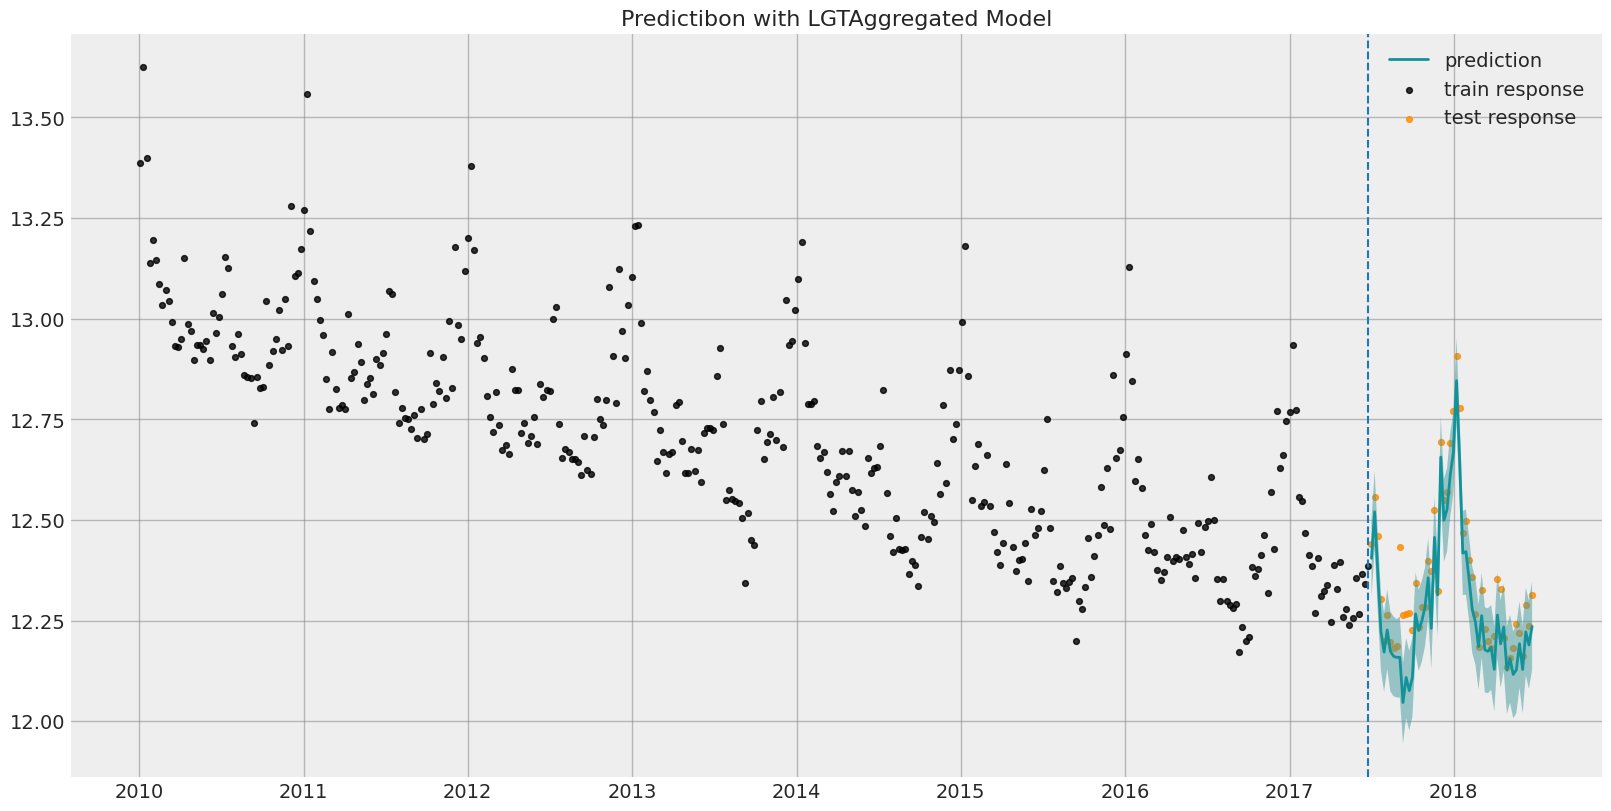

In [19]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df,
                        title='Predictibon with LGTAggregated Model')

More details for each method are available in the docstrings and also here: https://orbit-ml.readthedocs.io/en/latest/orbit.models.html#module-orbit.models.lgt